# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
data = pd.read_csv("../data/Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

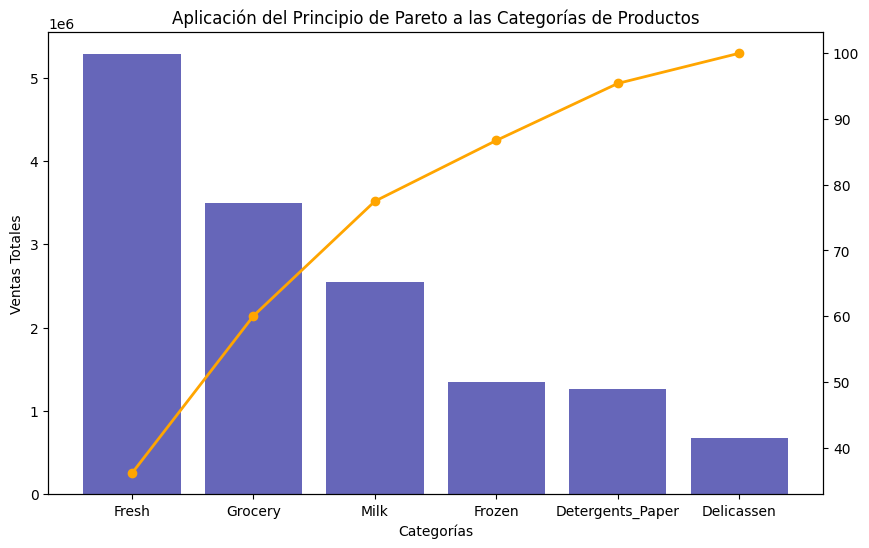

Totales de Ventas por Categoría:
Fresh               5280131
Grocery             3498562
Milk                2550357
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

Porcentaje Acumulado por Categoría:
Fresh                36.117042
Grocery              60.047833
Milk                 77.492732
Frozen               86.738261
Detergents_Paper     95.410630
Delicassen          100.000000
dtype: float64


In [3]:
# PARETO
category_totals = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum()

category_totals = category_totals.sort_values(ascending=False)

# Calcular el porcentaje acumulado
category_totals_cumsum = category_totals.cumsum()
category_totals_percentage = 100 * category_totals_cumsum / category_totals.sum()

# Pareto Plot
plt.figure(figsize=(10, 6))

plt.bar(category_totals.index, category_totals, color='darkblue', alpha=0.6)

plt.title('Aplicación del Principio de Pareto a las Categorías de Productos')
plt.xlabel('Categorías')
plt.ylabel('Ventas Totales')
plt.twinx().plot(category_totals.index, category_totals_percentage, color='orange', marker='o', linestyle='-', linewidth=2)
# plt.legend()
plt.show()

print("Totales de Ventas por Categoría:")
print(category_totals)
print("\nPorcentaje Acumulado por Categoría:")
print(category_totals_percentage)

**Tus observaciones aquí**

+ **Frozen, Grocery, Milk** tienen una gran contribución combinada a las ventas totales. Juntas, estas categorías representan un alto porcentaje de las ventas, específicamente el **77.49%**. Esto refleja que un número relativamente pequeño de categorías está generando la mayor parte de los ingresos, siguiendo el principio de Pareto.
+ Patrón de Pareto: Estas categorías siguen el patrón del principio de Pareto, donde unas pocas causas (categorías) explican la mayoría de los efectos (ventas).

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


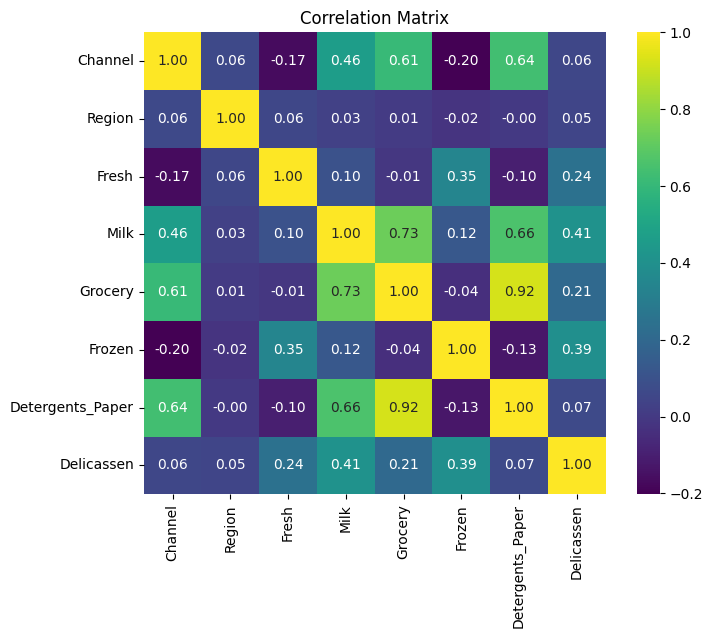

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [7]:
#  Se puede observar que no hay datos nulos o NaN
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.describe([.25,.5,.75,.95, .99])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
95%,2.000000,3.000000,36818.500000,16843.400000,24033.500000,9930.750000,12043.200000,4485.400000
99%,2.000000,3.000000,56082.610000,37610.060000,43435.740000,17964.820000,22571.610000,8274.660000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
data.nlargest(3, 'Fresh') # Top 3 more expensive

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550
125,1,3,76237,3473,7102,16538,778,918
284,1,3,68951,4411,12609,8692,751,2406


In [10]:
data.nlargest(3, 'Milk') # Top 3 more expensive

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,2,3,22925,73498,32114,987,20070,903
47,2,3,44466,54259,55571,7782,24171,6465
85,2,3,16117,46197,92780,1026,40827,2944


In [11]:
data.nlargest(3, 'Grocery') # Top 3 more expensive

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215
61,2,3,35942,38369,59598,3254,26701,2017


Text(0.5, 1.0, 'Box Plot of Wholesale variables')

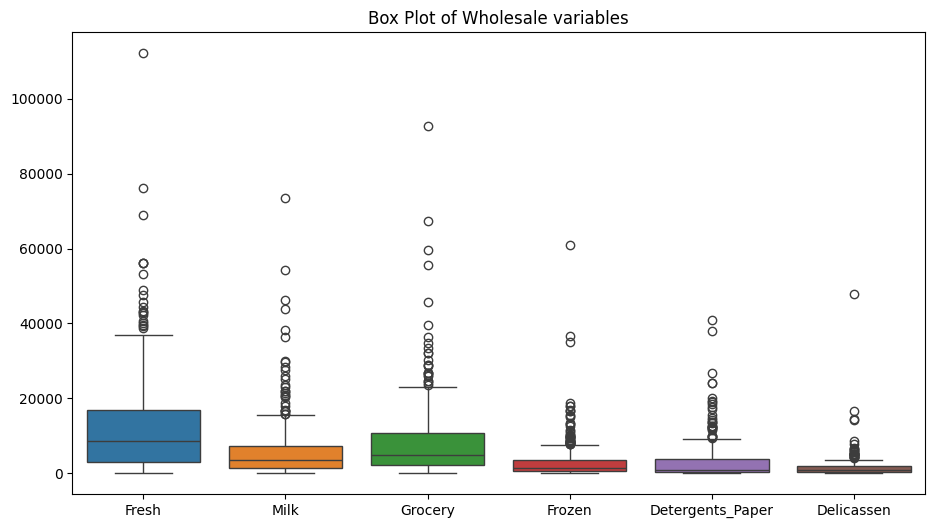

In [12]:
import seaborn as sns
plt.figure(figsize=(11, 6))
sns.boxplot(data=data.drop(columns=['Channel', 'Region']))
plt.title('Box Plot of Wholesale variables')

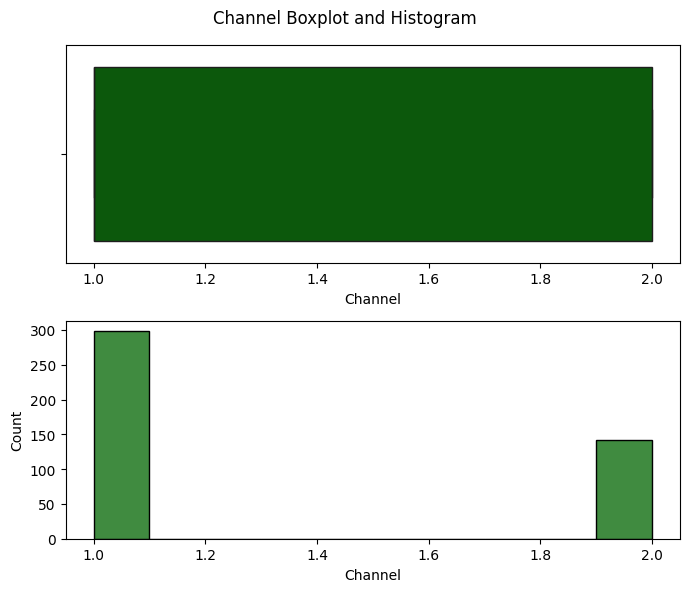

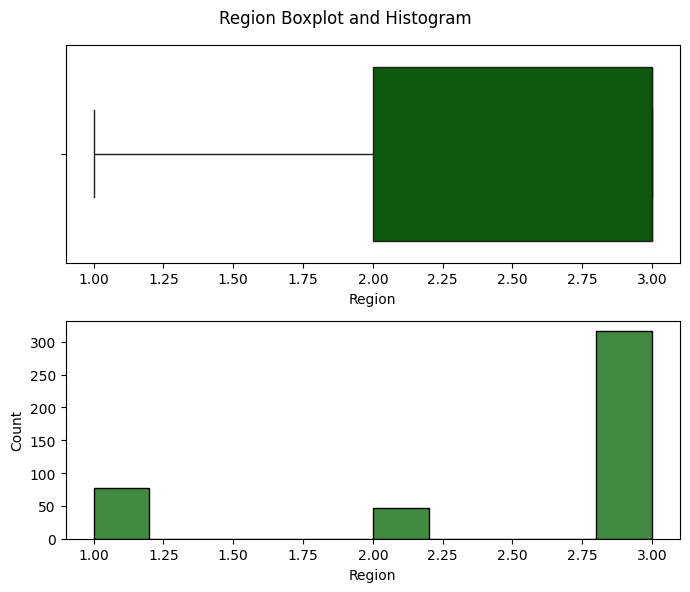

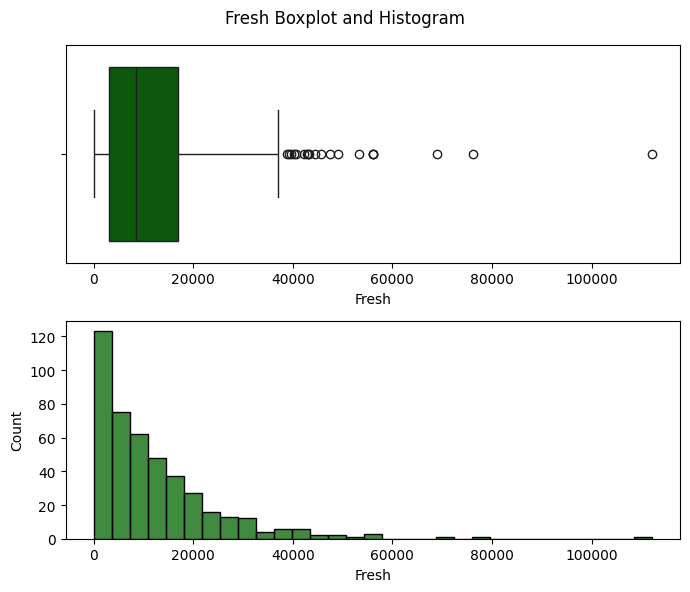

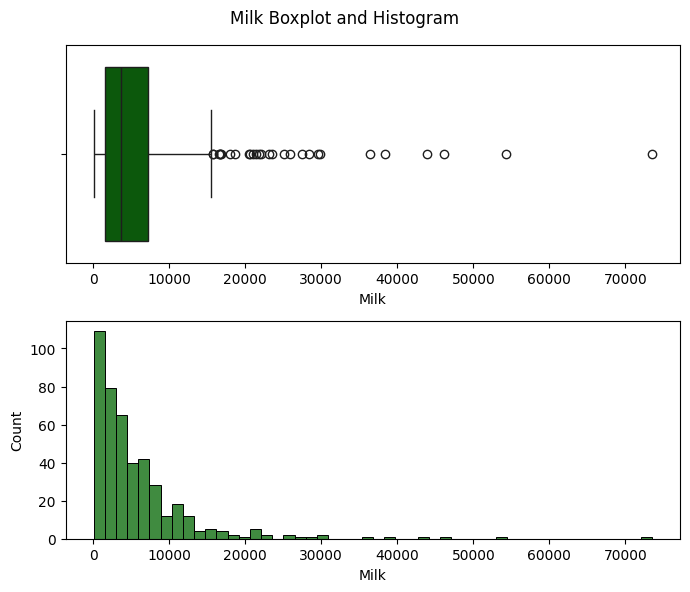

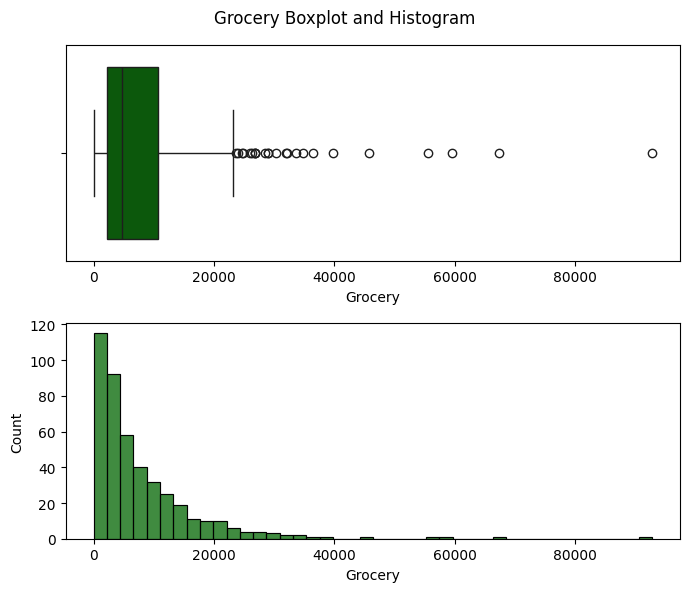

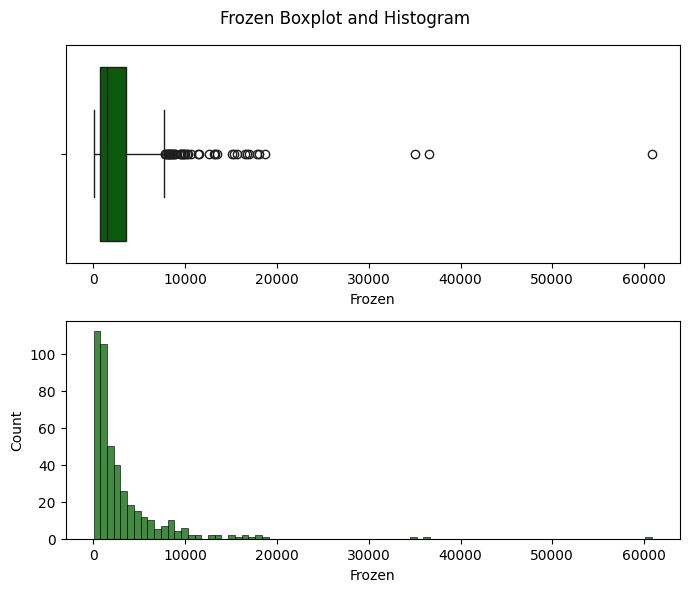

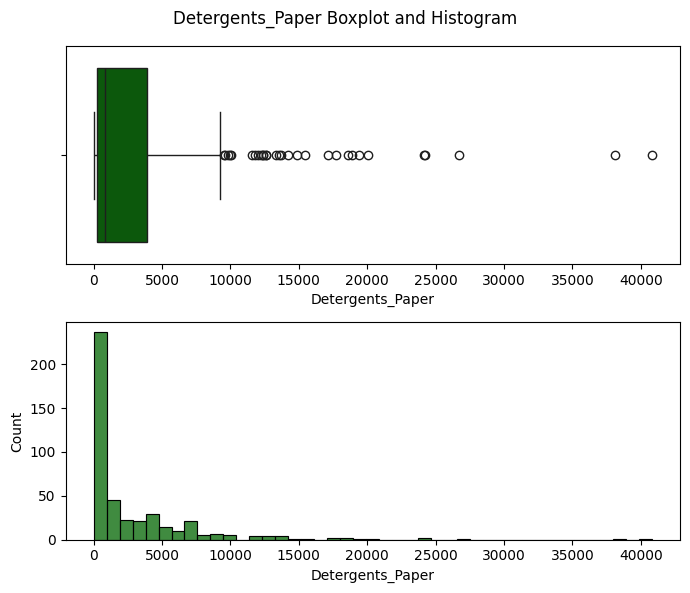

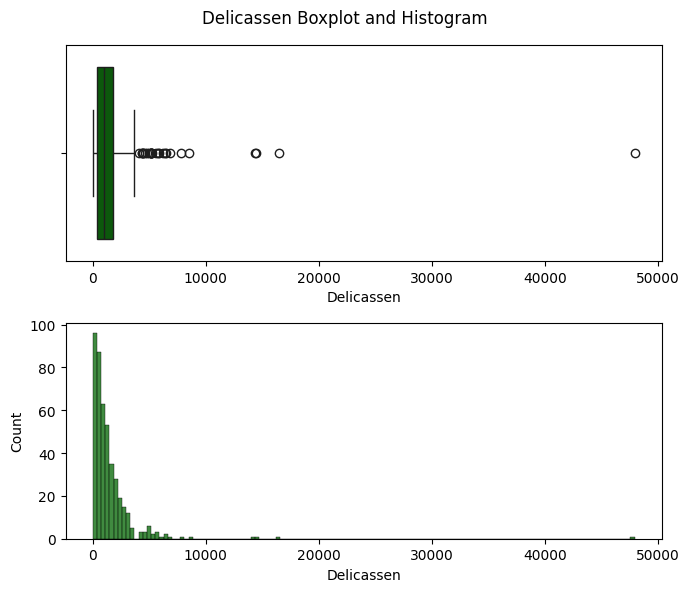

In [13]:
for col in data.columns: 
    fig, axs = plt.subplots(2,1, figsize=(7, 6))
    axs = axs.flatten()
    
    sns.boxplot(data=data, x=col, ax=axs[0], color='darkgreen')
    sns.histplot(data=data, x=col, ax=axs[1], color='darkgreen')
    plt.suptitle(f"{col} Boxplot and Histogram")
    plt.tight_layout()
    plt.show()

In [14]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Text(0.5, 1.0, 'Box Plot of Wholesale variables filtering outliers < P95')

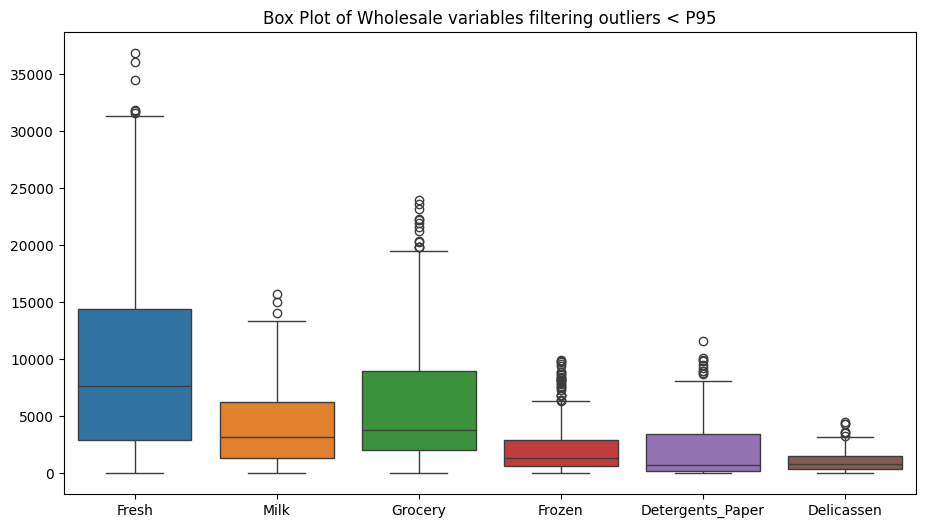

In [15]:
# Quitando outliers > P99
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
# Calcular p95 solo para esas columnas
p99 = data[columns].quantile(0.95)

# Filtrar valores por debajo de p99 en esas columnas
data = data[(data[columns] < p99).all(axis=1)]
data.describe([.95])

plt.figure(figsize=(11, 6))
sns.boxplot(data=data.drop(columns=['Channel', 'Region']))
plt.title('Box Plot of Wholesale variables filtering outliers < P95')

**Tus observaciones aquí**

+ Parece que el dataset está bastante limpio, no tiene nulos ni NaN
+ Tiene outliers, si vemos el boxplot se observa lo mismo que en el Pareto, Fresh, Grocery y Milk son las que mayores valores acumulan en comparación con Frozen, Detergents_Paper y Delicatessen que tienen rangos de valores menores

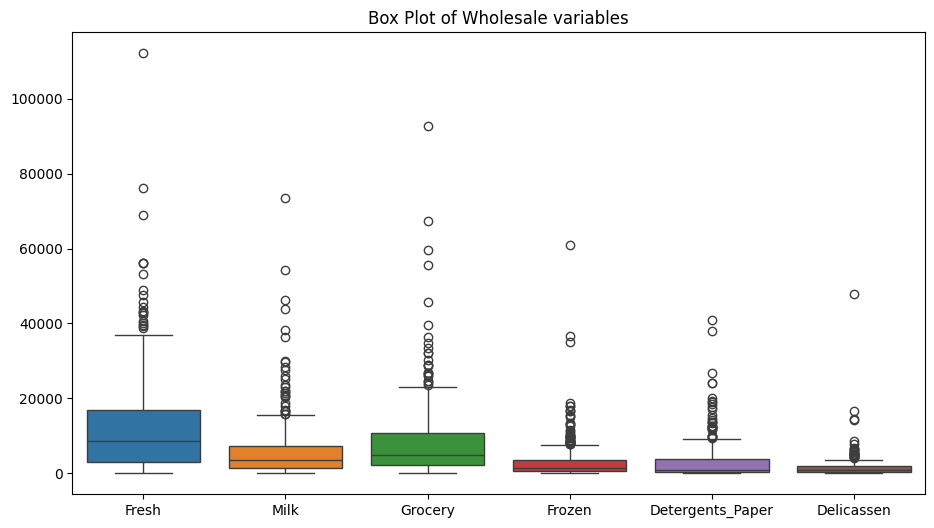

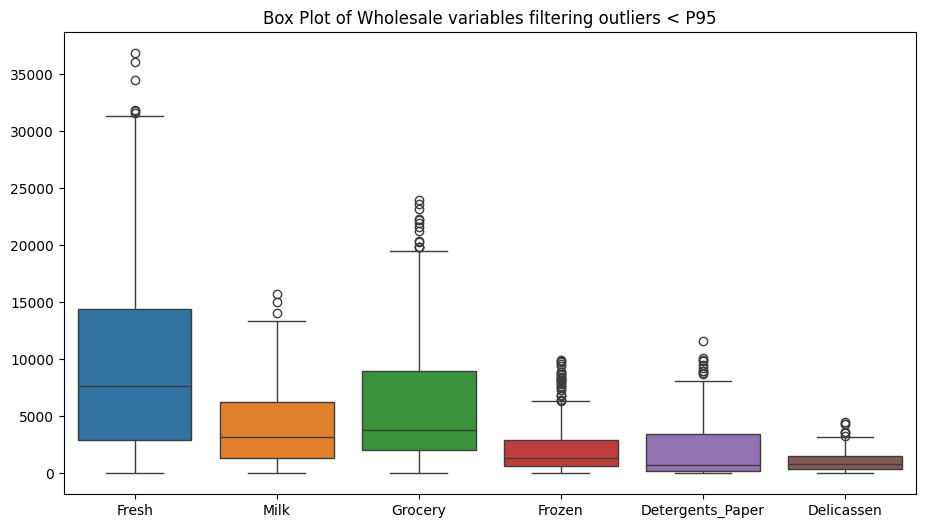

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [16]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler().fit(data)
customers_scale = scaler.transform(data)
customers_scale

array([[ 1.56278843,  0.58781979,  0.37898956, ..., -0.8795221 ,
         0.25166945,  0.3394275 ],
       [ 1.56278843,  0.58781979, -0.31542767, ..., -0.18882147,
         0.49701705,  0.84353902],
       [-0.63988188,  0.58781979,  0.45273737, ...,  1.88238805,
        -0.60724533,  0.85735029],
       ...,
       [-0.63988188,  0.58781979,  0.88161301, ..., -0.6680285 ,
         0.131572  , -0.23604227],
       [-0.63988188,  0.58781979,  0.08461704, ..., -0.51186233,
        -0.74161178,  1.24521692],
       [-0.63988188,  0.58781979, -0.84378861, ..., -0.94600427,
        -0.61913616, -1.14068075]])

In [17]:
customers_scale.shape

(358, 8)

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [18]:
from sklearn.cluster import KMeans

## K-means using k = 2
kmeans = KMeans(random_state=42)

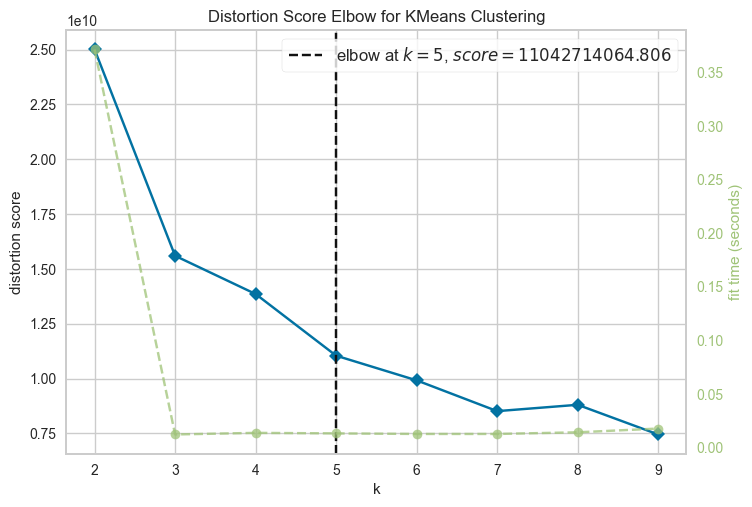

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10))

# Fit the visualizer to the data
# This will run K-means clustering for each value of k and calculate the distortion score for each
visualizer.fit(data)

# Render the plot
# The Elbow plot displays the distortion score for each k
# The point where the distortion score starts to level off ('elbow') is the recommended number of clusters
visualizer.show()

### Viendo el elbow podríamos escoger 2 como el número de clusters correctos

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(customers_scale)
labels = kmeans.predict(customers_scale)

clusters = kmeans.labels_.tolist()

In [21]:
data['Label'] = clusters
data

C:\Users\emartin4\AppData\Local\Temp\ipykernel_2880\2380160644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = clusters


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
3,1,3,13265,1196,4221,6404,507,1788,1
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0
...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,1
433,1,3,1982,3218,1493,1541,356,1449,1
434,1,3,16731,3922,7994,688,2371,838,1
438,1,3,10290,1981,2232,1038,168,2125,1


Cuenta los valores en `labels`.

In [22]:
data['Label'].value_counts()

Label
1    254
0    104
Name: count, dtype: int64

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [23]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
dbscan.fit_predict(customers_scale)
clusters = dbscan.labels_.tolist()
data['labels_DBSCAN'] = clusters

C:\Users\emartin4\AppData\Local\Temp\ipykernel_2880\2776542858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels_DBSCAN'] = clusters


Cuenta los valores en `labels_DBSCAN`.

In [24]:
data['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    326
 0     32
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [25]:
def plot(data,x,y,hue):
    sns.scatterplot(data=data, 
                    x=x, 
                    y=y,
                    hue=hue)
    plt.title(f'{x} vs {y} ')
    return plt.show()

In [26]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,-1
5,2,3,9413,8259,5126,666,1795,1451,0,-1
6,2,3,12126,3199,6975,480,3140,545,0,-1
...,...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,1,-1
433,1,3,1982,3218,1493,1541,356,1449,1,-1
434,1,3,16731,3922,7994,688,2371,838,1,-1
438,1,3,10290,1981,2232,1038,168,2125,1,-1


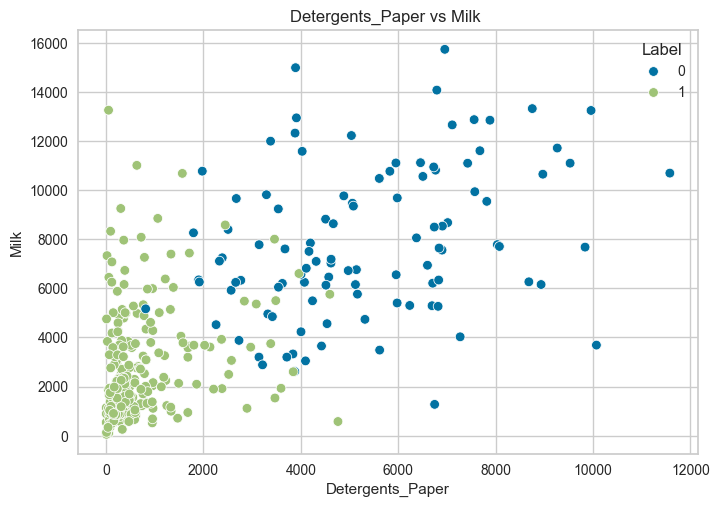

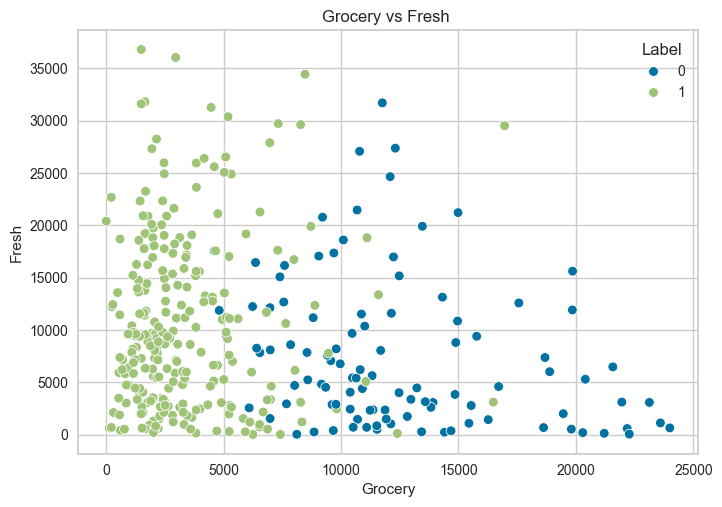

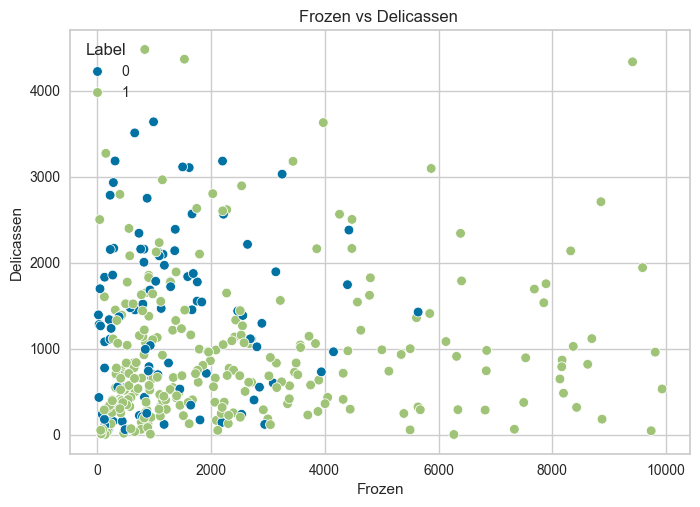

In [27]:
# K-Means K=2
for x, y in zip(['Detergents_Paper', 'Grocery', 'Frozen'], ['Milk', 'Fresh', 'Delicassen']):
    plot(data=data, x=x, y=y, hue='Label')

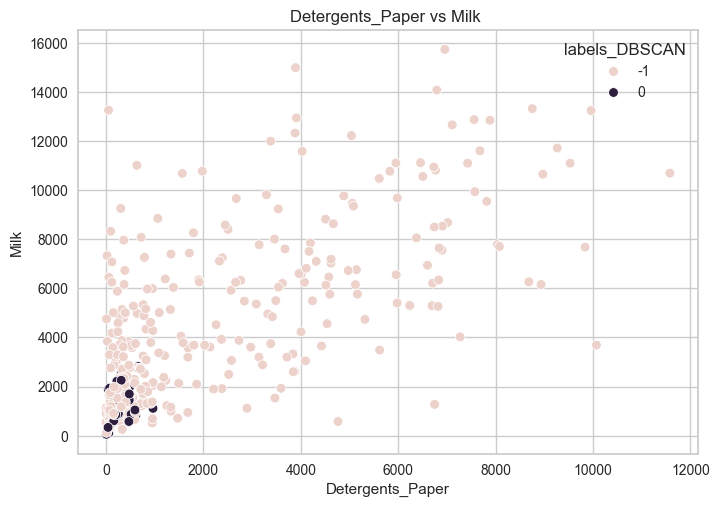

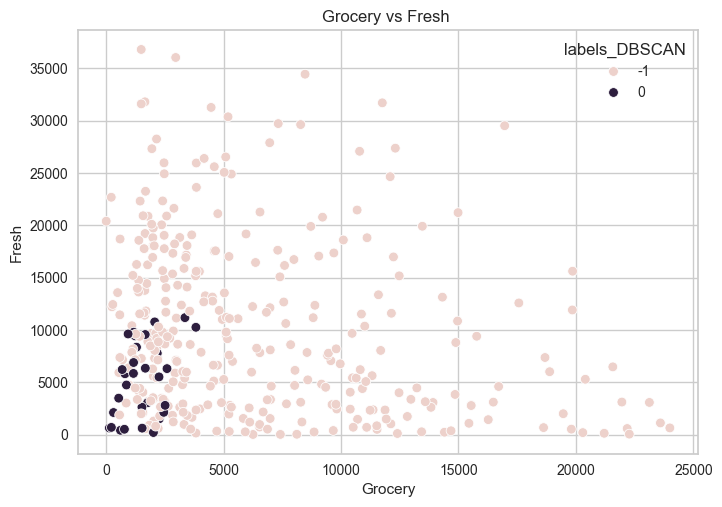

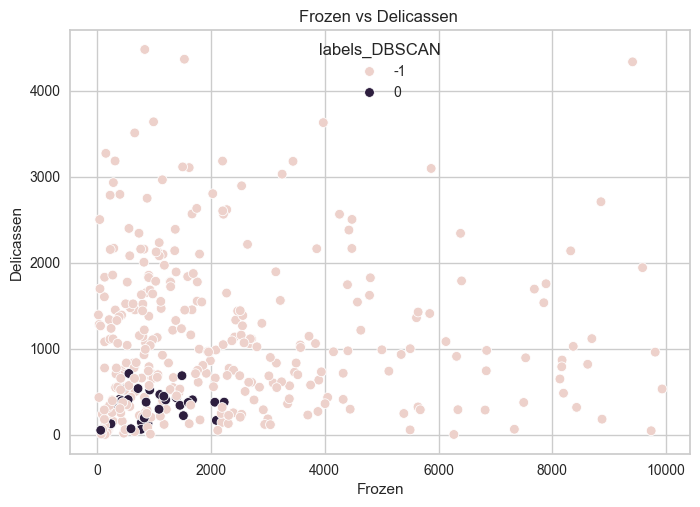

In [28]:
# DBSCAN
for x, y in zip(['Detergents_Paper', 'Grocery', 'Frozen'], ['Milk', 'Fresh', 'Delicassen']):
    plot(data=data, x=x, y=y, hue='labels_DBSCAN')

In [29]:
data[['Label']].value_counts()

Label
1        254
0        104
Name: count, dtype: int64

In [30]:
data[['labels_DBSCAN']].value_counts()

labels_DBSCAN
-1               326
 0                32
Name: count, dtype: int64

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [31]:
data[['Label', 'labels_DBSCAN']].value_counts()

Label  labels_DBSCAN
1      -1               222
0      -1               104
1       0                32
Name: count, dtype: int64

In [32]:
data.groupby(['Label', 'labels_DBSCAN']).agg('mean')

Channel    Region         Fresh         Milk  \
Label labels_DBSCAN                                                  
0     -1             1.942308  2.644231   7445.644231  7890.163462   
1     -1             1.027027  2.432432  11240.009009  2872.725225   
       0             1.000000  3.000000   5293.000000  1212.875000   

                          Grocery       Frozen  Detergents_Paper   Delicassen  
Label labels_DBSCAN                                                            
0     -1             12493.413462  1260.048077       5342.788462  1299.230769  
1     -1              3622.509009  2793.090090        745.486486  1025.175676  
       0              1585.750000   974.562500        276.000000   334.875000

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

Funciona mejor el K-Means en este caso

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

### EXTRA Viendo el elbow podríamos escoger 5 como el número de clusters correctos

In [33]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(customers_scale)
labels = kmeans.predict(customers_scale)

clusters = kmeans.labels_.tolist()

In [34]:
data['Label_k5'] = clusters
data

C:\Users\emartin4\AppData\Local\Temp\ipykernel_2880\3334077831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label_k5'] = clusters


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN,Label_k5
0,2,3,12669,9656,7561,214,2674,1338,0,-1,2
1,2,3,7057,9810,9568,1762,3293,1776,0,-1,2
3,1,3,13265,1196,4221,6404,507,1788,1,-1,4
5,2,3,9413,8259,5126,666,1795,1451,0,-1,2
6,2,3,12126,3199,6975,480,3140,545,0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,1,-1,3
433,1,3,1982,3218,1493,1541,356,1449,1,-1,3
434,1,3,16731,3922,7994,688,2371,838,1,-1,3
438,1,3,10290,1981,2232,1038,168,2125,1,-1,3


Cuenta los valores en `labels`.

In [35]:
data['Label_k5'].value_counts()

Label_k5
3    129
1     66
2     63
4     58
0     42
Name: count, dtype: int64

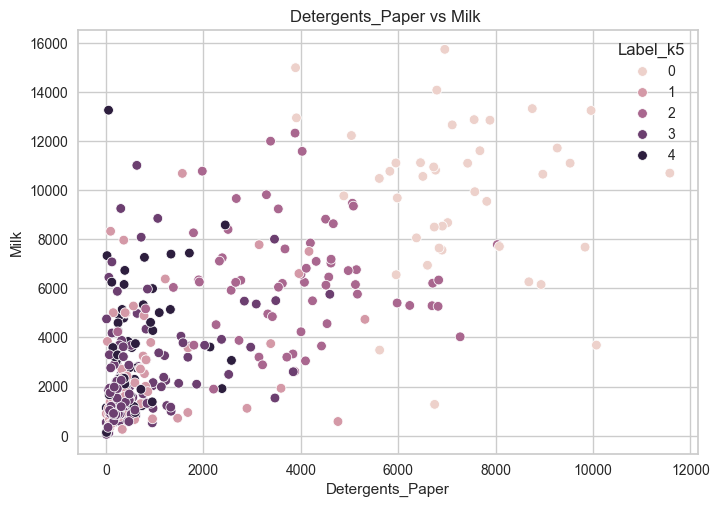

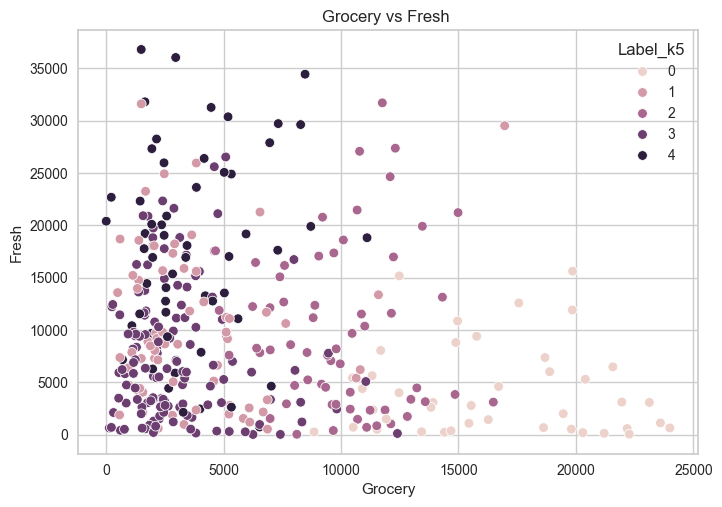

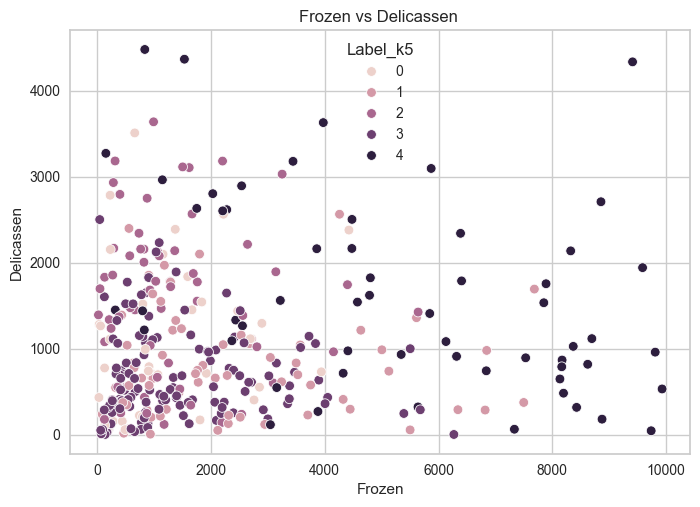

In [36]:
# K-Means K=5
for x, y in zip(['Detergents_Paper', 'Grocery', 'Frozen'], ['Milk', 'Fresh', 'Delicassen']):
    plot(data=data, x=x, y=y, hue='Label_k5')

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [37]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
